In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, AlphaDropout , LayerNormalization , BatchNormalization , Dropout
from tensorflow_addons.layers import WeightNormalization

/Users/harsh/miniforge3/envs/my_tf_env/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Data Preprocessing

In [2]:
data = pd.read_csv("HTRU_2.csv") # Reading the Data and finding the shape
X =  data.iloc[:,:8]
y =  data.iloc[:,-1:]
X.shape, y.shape

((17897, 8), (17897, 1))

In [3]:
#Split the Dataset and convert it into numpy
X_train , X_test , y_train , y_test =train_test_split(X,y,test_size=0.2)
temp_data, X_test, temp_labels, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(temp_data, temp_labels, test_size=0.25, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

## Models

In [6]:
#SNN Class

def create_model(num_layers,dropr):
    model = Sequential()
    model.add(Flatten())
    
    for _ in range(num_layers):
        model.add(Dense(512, activation='selu', kernel_initializer='lecun_normal', bias_initializer='zeros'))
        model.add(AlphaDropout(dropr))

    model.add(Dense(1, activation='sigmoid'))
    return model

def compile_model(model):
    """
    Compile the neural network model with appropriate configuration.
    """
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128):
    """
    Train the neural network model on the provided data.
    """
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val))
    return history

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the neural network model on the test data and print the results.
    """
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score


In [7]:
snn_accuracy=[]
snn_loss=[]
for num_layers in range(2,8):
    for dropr in [0.05,0.1]:
        num_layers = 3  # You can set the number of layers as needed
        model = create_model(num_layers,dropr)
        compile_model(model)
        train_model(model, X_train, y_train, X_val, y_val)
        # Evaluate model
        score = evaluate_model(model, X_test, y_test)
        snn_accuracy.append(score[1])
        snn_loss.append(score[0])

Epoch 1/50


2023-11-30 19:36:11.385358: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 2s 22ms/step - loss: 2.3717 - accuracy: 0.9374 - val_loss: 0.7260 - val_accuracy: 0.9743
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.3624 - accuracy: 0.9572 - val_loss: 0.5346 - val_accuracy: 0.9589
Epoch 3/50
84/84 [==============================] - 2s 18ms/step - loss: 0.3368 - accuracy: 0.9567 - val_loss: 0.2536 - val_accuracy: 0.9397
Epoch 4/50
84/84 [==============================] - 2s 23ms/step - loss: 0.2016 - accuracy: 0.9607 - val_loss: 0.1394 - val_accuracy: 0.9746
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1454 - accuracy: 0.9666 - val_loss: 0.1472 - val_accuracy: 0.9662
Epoch 6/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1427 - accuracy: 0.9653 - val_loss: 0.1645 - val_accuracy: 0.9726
Epoch 7/50
84/84 [==============================] - 2s 18ms/step - loss: 0.1353 - accuracy: 0.9654 - val_loss: 0.1154 - val_accuracy: 0.9687
Epoch 8/50
84/84 [======

Test loss: 0.08436606824398041
Test accuracy: 0.9779329895973206
Epoch 1/50


2023-11-30 19:37:31.195002: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 21ms/step - loss: 1.3408 - accuracy: 0.9452 - val_loss: 0.6368 - val_accuracy: 0.9726
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2635 - accuracy: 0.9587 - val_loss: 0.1815 - val_accuracy: 0.9712
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2033 - accuracy: 0.9607 - val_loss: 0.1378 - val_accuracy: 0.9743
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1479 - accuracy: 0.9656 - val_loss: 0.1597 - val_accuracy: 0.9684
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1252 - accuracy: 0.9673 - val_loss: 0.1381 - val_accuracy: 0.9712
Epoch 6/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1195 - accuracy: 0.9671 - val_loss: 0.1278 - val_accuracy: 0.9729
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1087 - accuracy: 0.9708 - val_loss: 0.1066 - val_accuracy: 0.9757
Epoch 8/50
84/84 [======

Test loss: 0.0846513956785202
Test accuracy: 0.9773743152618408
Epoch 1/50


2023-11-30 19:38:43.337374: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 2s 21ms/step - loss: 2.0040 - accuracy: 0.9369 - val_loss: 1.0869 - val_accuracy: 0.9693
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.3361 - accuracy: 0.9610 - val_loss: 0.2439 - val_accuracy: 0.9648
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1863 - accuracy: 0.9618 - val_loss: 0.1634 - val_accuracy: 0.9707
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1407 - accuracy: 0.9652 - val_loss: 0.2151 - val_accuracy: 0.9612
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1365 - accuracy: 0.9656 - val_loss: 0.1446 - val_accuracy: 0.9662
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1291 - accuracy: 0.9674 - val_loss: 0.1152 - val_accuracy: 0.9732
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1083 - accuracy: 0.9716 - val_loss: 0.1028 - val_accuracy: 0.9735
Epoch 8/50
84/84 [======

Test loss: 0.08421895653009415
Test accuracy: 0.9784916043281555
Epoch 1/50


2023-11-30 19:39:54.712895: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 25ms/step - loss: 0.7297 - accuracy: 0.9499 - val_loss: 0.5908 - val_accuracy: 0.9628
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2174 - accuracy: 0.9599 - val_loss: 0.1576 - val_accuracy: 0.9690
Epoch 3/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1513 - accuracy: 0.9642 - val_loss: 0.1797 - val_accuracy: 0.9654
Epoch 4/50
84/84 [==============================] - 2s 20ms/step - loss: 0.1365 - accuracy: 0.9648 - val_loss: 0.1222 - val_accuracy: 0.9757
Epoch 5/50
84/84 [==============================] - 1s 18ms/step - loss: 0.1086 - accuracy: 0.9699 - val_loss: 0.0987 - val_accuracy: 0.9754
Epoch 6/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1100 - accuracy: 0.9684 - val_loss: 0.1368 - val_accuracy: 0.9721
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1053 - accuracy: 0.9702 - val_loss: 0.1222 - val_accuracy: 0.9740
Epoch 8/50
84/84 [======

Test loss: 0.08074142038822174
Test accuracy: 0.978212296962738
Epoch 1/50


2023-11-30 19:41:08.274956: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 2s 22ms/step - loss: 2.8178 - accuracy: 0.9363 - val_loss: 0.3833 - val_accuracy: 0.9561
Epoch 2/50
84/84 [==============================] - 1s 16ms/step - loss: 0.4950 - accuracy: 0.9573 - val_loss: 0.2445 - val_accuracy: 0.9712
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 0.2604 - accuracy: 0.9594 - val_loss: 0.1094 - val_accuracy: 0.9740
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2092 - accuracy: 0.9625 - val_loss: 0.1179 - val_accuracy: 0.9726
Epoch 5/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1385 - accuracy: 0.9674 - val_loss: 0.1041 - val_accuracy: 0.9749
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1143 - accuracy: 0.9714 - val_loss: 0.1624 - val_accuracy: 0.9628
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1162 - accuracy: 0.9697 - val_loss: 0.0953 - val_accuracy: 0.9765
Epoch 8/50
84/84 [======

Test loss: 0.07559872418642044
Test accuracy: 0.9784916043281555
Epoch 1/50


2023-11-30 19:42:18.009275: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 23ms/step - loss: 1.5706 - accuracy: 0.9437 - val_loss: 0.3195 - val_accuracy: 0.9645
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2062 - accuracy: 0.9613 - val_loss: 0.2093 - val_accuracy: 0.9640
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1425 - accuracy: 0.9661 - val_loss: 0.1391 - val_accuracy: 0.9696
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1361 - accuracy: 0.9666 - val_loss: 0.1178 - val_accuracy: 0.9729
Epoch 5/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1236 - accuracy: 0.9669 - val_loss: 0.1460 - val_accuracy: 0.9723
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1211 - accuracy: 0.9680 - val_loss: 0.1318 - val_accuracy: 0.9743
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1111 - accuracy: 0.9696 - val_loss: 0.1226 - val_accuracy: 0.9709
Epoch 8/50
84/84 [======

Test loss: 0.10913889110088348
Test accuracy: 0.9754189848899841
Epoch 1/50


2023-11-30 19:43:27.931449: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 23ms/step - loss: 2.0164 - accuracy: 0.9423 - val_loss: 0.5221 - val_accuracy: 0.9612
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2686 - accuracy: 0.9618 - val_loss: 0.2546 - val_accuracy: 0.9709
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1708 - accuracy: 0.9623 - val_loss: 0.2638 - val_accuracy: 0.9648
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 0.2073 - accuracy: 0.9619 - val_loss: 0.1099 - val_accuracy: 0.9709
Epoch 5/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1390 - accuracy: 0.9672 - val_loss: 0.1210 - val_accuracy: 0.9737
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1236 - accuracy: 0.9668 - val_loss: 0.1715 - val_accuracy: 0.9737
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1249 - accuracy: 0.9694 - val_loss: 0.1069 - val_accuracy: 0.9673
Epoch 8/50
84/84 [======

Test loss: 0.08394981920719147
Test accuracy: 0.9773743152618408
Epoch 1/50


2023-11-30 19:44:38.352911: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 23ms/step - loss: 1.1424 - accuracy: 0.9449 - val_loss: 0.4367 - val_accuracy: 0.9648
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.2238 - accuracy: 0.9611 - val_loss: 0.2473 - val_accuracy: 0.9698
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1390 - accuracy: 0.9667 - val_loss: 0.1500 - val_accuracy: 0.9723
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1307 - accuracy: 0.9658 - val_loss: 0.1401 - val_accuracy: 0.9693
Epoch 5/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1192 - accuracy: 0.9684 - val_loss: 0.2364 - val_accuracy: 0.9581
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1105 - accuracy: 0.9689 - val_loss: 0.1204 - val_accuracy: 0.9743
Epoch 7/50
84/84 [==============================] - 1s 16ms/step - loss: 0.1062 - accuracy: 0.9700 - val_loss: 0.1903 - val_accuracy: 0.9628
Epoch 8/50
84/84 [======

Test loss: 0.08075081557035446
Test accuracy: 0.9768156409263611
Epoch 1/50


2023-11-30 19:45:51.594779: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 27ms/step - loss: 4.0163 - accuracy: 0.9297 - val_loss: 0.8530 - val_accuracy: 0.9187
Epoch 2/50
84/84 [==============================] - 2s 19ms/step - loss: 0.7918 - accuracy: 0.9532 - val_loss: 0.3876 - val_accuracy: 0.9729
Epoch 3/50
84/84 [==============================] - 2s 20ms/step - loss: 0.2920 - accuracy: 0.9579 - val_loss: 0.2233 - val_accuracy: 0.9743
Epoch 4/50
84/84 [==============================] - 2s 19ms/step - loss: 0.2237 - accuracy: 0.9595 - val_loss: 0.1861 - val_accuracy: 0.9751
Epoch 5/50
84/84 [==============================] - 2s 21ms/step - loss: 0.1967 - accuracy: 0.9613 - val_loss: 0.1552 - val_accuracy: 0.9740
Epoch 6/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1471 - accuracy: 0.9649 - val_loss: 0.1504 - val_accuracy: 0.9726
Epoch 7/50
84/84 [==============================] - 2s 18ms/step - loss: 0.1337 - accuracy: 0.9672 - val_loss: 0.1748 - val_accuracy: 0.9631
Epoch 8/50
84/84 [======

Test loss: 0.07819698750972748
Test accuracy: 0.9784916043281555
Epoch 1/50


2023-11-30 19:47:06.137836: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 25ms/step - loss: 1.1361 - accuracy: 0.9457 - val_loss: 0.3439 - val_accuracy: 0.9654
Epoch 2/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1996 - accuracy: 0.9618 - val_loss: 0.1384 - val_accuracy: 0.9732
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1828 - accuracy: 0.9621 - val_loss: 0.1641 - val_accuracy: 0.9721
Epoch 4/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1345 - accuracy: 0.9656 - val_loss: 0.1624 - val_accuracy: 0.9656
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1222 - accuracy: 0.9675 - val_loss: 0.1421 - val_accuracy: 0.9628
Epoch 6/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1240 - accuracy: 0.9668 - val_loss: 0.1075 - val_accuracy: 0.9740
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 0.1141 - accuracy: 0.9679 - val_loss: 0.1101 - val_accuracy: 0.9737
Epoch 8/50
84/84 [======

Test loss: 0.08640465885400772
Test accuracy: 0.9787709712982178
Epoch 1/50


2023-11-30 19:48:21.251813: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 3s 27ms/step - loss: 2.6061 - accuracy: 0.9423 - val_loss: 0.8126 - val_accuracy: 0.9754
Epoch 2/50
84/84 [==============================] - 1s 18ms/step - loss: 0.4461 - accuracy: 0.9580 - val_loss: 0.2466 - val_accuracy: 0.9740
Epoch 3/50
84/84 [==============================] - 2s 19ms/step - loss: 0.2984 - accuracy: 0.9555 - val_loss: 0.2023 - val_accuracy: 0.9723
Epoch 4/50
84/84 [==============================] - 2s 22ms/step - loss: 0.1998 - accuracy: 0.9612 - val_loss: 0.1793 - val_accuracy: 0.9698
Epoch 5/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1409 - accuracy: 0.9658 - val_loss: 0.1214 - val_accuracy: 0.9682
Epoch 6/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1903 - accuracy: 0.9655 - val_loss: 0.1401 - val_accuracy: 0.9709
Epoch 7/50
84/84 [==============================] - 2s 20ms/step - loss: 0.1282 - accuracy: 0.9687 - val_loss: 0.1093 - val_accuracy: 0.9743
Epoch 8/50
84/84 [======

Test loss: 0.0801386758685112
Test accuracy: 0.9768156409263611
Epoch 1/50


2023-11-30 19:49:43.044396: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


84/84 [==============================] - 4s 28ms/step - loss: 1.5329 - accuracy: 0.9429 - val_loss: 0.2912 - val_accuracy: 0.9737
Epoch 2/50
84/84 [==============================] - 2s 23ms/step - loss: 0.2519 - accuracy: 0.9593 - val_loss: 0.2590 - val_accuracy: 0.9723
Epoch 3/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1716 - accuracy: 0.9666 - val_loss: 0.1324 - val_accuracy: 0.9662
Epoch 4/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1447 - accuracy: 0.9639 - val_loss: 0.2272 - val_accuracy: 0.9701
Epoch 5/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1379 - accuracy: 0.9664 - val_loss: 0.1430 - val_accuracy: 0.9698
Epoch 6/50
84/84 [==============================] - 2s 20ms/step - loss: 0.1165 - accuracy: 0.9689 - val_loss: 0.1078 - val_accuracy: 0.9732
Epoch 7/50
84/84 [==============================] - 2s 19ms/step - loss: 0.1185 - accuracy: 0.9681 - val_loss: 0.1908 - val_accuracy: 0.9645
Epoch 8/50
84/84 [======

In [9]:
#WeightNorm Model

def weightnorm_create_model(num_layers,dropr):
    model = Sequential()
    model.add(Flatten())
    
    for _ in range(num_layers):
        model.add(WeightNormalization(Dense(512, activation='relu', kernel_initializer='lecun_normal', bias_initializer='zeros')))
        model.add(Dropout(dropr))

    model.add(Dense(1, activation='sigmoid'))
    return model

def weightnorm_compile_model(model):
    """
    Compile the neural network model with appropriate configuration.
    """
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
def weightnorm_train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128):
    """
    Train the neural network model on the provided data.
    """
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val))
    return history

def weightnorm_evaluate_model(model, X_test, y_test):
    """
    Evaluate the neural network model on the test data and print the results.
    """
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score


In [10]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined
weightnorm_accuracy=[]
weightnorm_loss=[]
for n_layer in range(2,8):
    for dropr in [0.05,0.1]:
        model = weightnorm_create_model(num_layers,dropr)
        weightnorm_compile_model(model)
        weightnorm_train_model(model, X_train, y_train, X_val, y_val)
        # Evaluate model
        score  = weightnorm_evaluate_model(model, X_test, y_test)
        weightnorm_loss.append(score[0])
        weightnorm_accuracy.append(score[1])

Epoch 1/50
84/84 [==============================] - 5s 35ms/step - loss: 0.2541 - accuracy: 0.9530 - val_loss: 0.1506 - val_accuracy: 0.9606
Epoch 2/50
84/84 [==============================] - 2s 18ms/step - loss: 0.2563 - accuracy: 0.9566 - val_loss: 0.1393 - val_accuracy: 0.9690
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 0.6704 - accuracy: 0.9498 - val_loss: 1.5136 - val_accuracy: 0.9288
Epoch 4/50
84/84 [==============================] - 2s 19ms/step - loss: 1.2430 - accuracy: 0.9516 - val_loss: 1.6021 - val_accuracy: 0.9494
Epoch 5/50
84/84 [==============================] - 2s 19ms/step - loss: 1.6470 - accuracy: 0.9542 - val_loss: 1.5233 - val_accuracy: 0.9673
Epoch 6/50
84/84 [==============================] - 1s 16ms/step - loss: 1.5482 - accuracy: 0.9530 - val_loss: 0.8795 - val_accuracy: 0.9603
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 1.7781 - accuracy: 0.9507 - val_loss: 2.1980 - val_accuracy: 0.9698
Epoch 8/50
84

In [13]:
#LayerNorm Model

def layernorm_create_model(num_layers, dropr):
    model = Sequential()
    model.add(Flatten())
    
    for _ in range(num_layers):
        model.add(LayerNormalization())
        model.add(Dense(512, activation='relu', kernel_initializer='lecun_normal', bias_initializer='zeros'))
        model.add(Dropout(dropr))
    model.add(Dense(1, activation='sigmoid'))
    return model

def layernorm_compile_model(model):
    """
    Compile the neural network model with appropriate configuration.
    """
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001), 
                  metrics=['accuracy'])
    
def layernorm_train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128):
    """
    Train the neural network model on the provided data.
    """
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val))
    return history

def layernorm_evaluate_model(model, X_test, y_test):
    """
    Evaluate the neural network model on the test data and print the results.
    """
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score


In [14]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined
layernorm_accuracy=[]
layernorm_loss=[]
for num_layer in range(2,8):
    for dropr in [0.05,0.1]:
        model = layernorm_create_model(num_layers,dropr)
        layernorm_compile_model(model)
        layernorm_train_model(model, X_train, y_train, X_val, y_val)
        # Evaluate model
        score = layernorm_evaluate_model(model, X_test, y_test)
        layernorm_accuracy.append(score[1])
        layernorm_loss.append(score[0])

Epoch 1/50
84/84 [==============================] - 4s 32ms/step - loss: 0.1683 - accuracy: 0.9565 - val_loss: 0.1198 - val_accuracy: 0.9648
Epoch 2/50
84/84 [==============================] - 2s 21ms/step - loss: 0.1538 - accuracy: 0.9570 - val_loss: 0.1659 - val_accuracy: 0.9570
Epoch 3/50
84/84 [==============================] - 1s 18ms/step - loss: 0.1931 - accuracy: 0.9511 - val_loss: 0.1352 - val_accuracy: 0.9690
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 0.2394 - accuracy: 0.9424 - val_loss: 0.2811 - val_accuracy: 0.9556
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.3382 - accuracy: 0.9396 - val_loss: 0.2818 - val_accuracy: 0.9620
Epoch 6/50
84/84 [==============================] - 1s 17ms/step - loss: 0.4442 - accuracy: 0.9377 - val_loss: 0.3322 - val_accuracy: 0.9570
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 0.3883 - accuracy: 0.9416 - val_loss: 0.2199 - val_accuracy: 0.9679
Epoch 8/50
84

In [17]:
#BatchNorm Model

def batchnorm_create_model(num_layers, dropr):
    model = Sequential()
    model.add(Flatten())
    
    for _ in range(num_layers):
        model.add(BatchNormalization())
        model.add(Dense(512, activation='relu', kernel_initializer='lecun_normal', bias_initializer='zeros'))
        model.add(Dropout(dropr))
    model.add(Dense(1, activation='sigmoid'))
    return model

def batchnorm_compile_model(model):
    """
    Compile the neural network model with appropriate configuration.
    """
    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    
def batchnorm_train_model(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=128):
    """
    Train the neural network model on the provided data.
    """
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_val, y_val))
    return history

def batchnorm_evaluate_model(model, X_test, y_test):
    """
    Evaluate the neural network model on the test data and print the results.
    """
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return score

In [18]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined
batchnorm_loss=[]
batchnorm_accuracy=[]
for num_layers in range(2,8):
    for dropr in [0.05,0.01]:
        model = batchnorm_create_model(num_layers,dropr)
        batchnorm_compile_model(model)
        batchnorm_train_model(model, X_train, y_train, X_val, y_val)
        # Evaluate model
        score=layernorm_evaluate_model(model, X_test, y_test)
        batchnorm_loss.append(score)
        batchnorm_accuracy.append(score)


Epoch 1/50
84/84 [==============================] - 5s 39ms/step - loss: 0.2426 - accuracy: 0.9342 - val_loss: 0.6607 - val_accuracy: 0.7545
Epoch 2/50
84/84 [==============================] - 1s 16ms/step - loss: 0.2423 - accuracy: 0.9484 - val_loss: 1.2825 - val_accuracy: 0.6372
Epoch 3/50
84/84 [==============================] - 1s 16ms/step - loss: 0.4877 - accuracy: 0.9378 - val_loss: 0.2286 - val_accuracy: 0.9754
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 0.6519 - accuracy: 0.9432 - val_loss: 0.5455 - val_accuracy: 0.9682
Epoch 5/50
84/84 [==============================] - 1s 16ms/step - loss: 0.7089 - accuracy: 0.9561 - val_loss: 0.4696 - val_accuracy: 0.9749
Epoch 6/50
84/84 [==============================] - 1s 15ms/step - loss: 0.6240 - accuracy: 0.9607 - val_loss: 0.6445 - val_accuracy: 0.9615
Epoch 7/50
84/84 [==============================] - 1s 17ms/step - loss: 0.7260 - accuracy: 0.9589 - val_loss: 0.5559 - val_accuracy: 0.9746
Epoch 8/50
84

In [28]:
# finding the accuracy
snn_acc = sum(snn_accuracy) / len(snn_accuracy)
batchnorm_acc = sum(batchnorm_accuracy) / len(batchnorm_accuracy)
layernorm_acc = sum(layernorm_accuracy) / len(layernorm_accuracy)
weightnorm_acc = sum(weightnorm_accuracy) / len(weightnorm_accuracy)

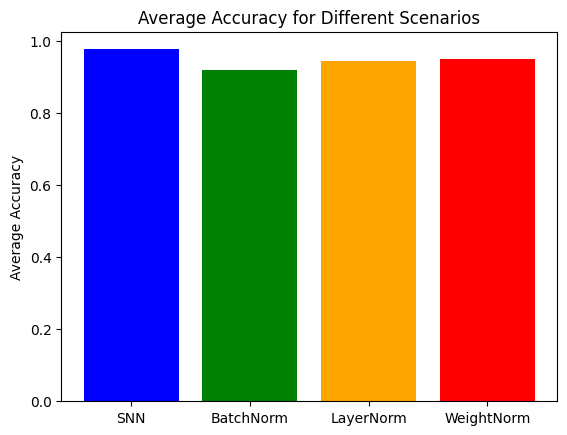

In [29]:
import matplotlib.pyplot as plt
# Plotting the average accuracy
labels = ['SNN', 'BatchNorm', 'LayerNorm', 'WeightNorm']
average_accuracies = [snn_acc, batchnorm_acc, layernorm_acc, weightnorm_acc]

plt.bar(labels, average_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Different Scenarios')
plt.show()